<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/220914_Gold_Price_Prediction_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link and I use it to practice my skills

https://thecleverprogrammer.com/2020/12/23/gold-price-prediction-with-python/

https://medium.com/coders-camp/180-data-science-and-machine-learning-projects-with-python-6191bc7b9db9

In [1]:
from pandas.core.generic import InvalidIndexError
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/gold_price.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4718 non-null   object 
 1   USD (AM)   4718 non-null   float64
 2   USD (PM)   4682 non-null   float64
 3   GBP (AM)   4718 non-null   float64
 4   GBP (PM)   4682 non-null   float64
 5   EURO (AM)  4718 non-null   float64
 6   EURO (PM)  4682 non-null   float64
dtypes: float64(6), object(1)
memory usage: 258.1+ KB


In [4]:
data.head()

,Date,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
0,2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
1,2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
2,2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
3,2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882
4,2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481


In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/gold_price.csv', parse_dates=True, index_col='Date')

In [6]:
df.head()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882
2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4718 entries, 2001-01-02 to 2019-09-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   USD (AM)   4718 non-null   float64
 1   USD (PM)   4682 non-null   float64
 2   GBP (AM)   4718 non-null   float64
 3   GBP (PM)   4682 non-null   float64
 4   EURO (AM)  4718 non-null   float64
 5   EURO (PM)  4682 non-null   float64
dtypes: float64(6)
memory usage: 258.0 KB


In [8]:
df['Return'] = df['USD (PM)'].pct_change()*100

In [9]:
df.head()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM),Return
Date,,,,,,,
2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334,NaN
2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655,-1.457027
2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049,-0.018716
2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882,0.112317
2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481,0.336574


In [10]:
df['Lagged_Return'] = df['Return'].shift()

In [11]:
df.isnull().sum()

USD (AM)          0
USD (PM)         36
GBP (AM)          0
GBP (PM)         36
EURO (AM)         0
EURO (PM)        36
Return            1
Lagged_Return     2
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.tail()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM),Return,Lagged_Return
Date,,,,,,,,
2019-08-27,1531.85,1532.95,1250.91,1247.51,1378.97,1380.88,1.938423,0.116507
2019-08-28,1541.75,1537.15,1263.31,1258.77,1389.89,1387.43,0.273982,1.938423
2019-08-29,1536.65,1540.20,1260.51,1262.96,1387.29,1392.03,0.198419,0.273982
2019-08-30,1526.55,1528.40,1253.14,1251.15,1382.75,1383.51,-0.766134,0.198419
2019-09-02,1523.35,1525.95,1260.42,1265.01,1388.69,1391.51,-0.160298,-0.766134


In [14]:
train = df['2001': '2018']
test = df['2019']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  


In [15]:
xtrain = train['Lagged_Return'].to_frame()
ytrain = train['Return']
xtest = test['Lagged_Return'].to_frame()
ytest = test['Return']

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [18]:
ypred = model.predict(xtest)

In [19]:
oosr = ytest.to_frame()

In [20]:
oosr.head()

,Return
Date,
2019-01-02,0.304926
2019-01-03,0.588510
2019-01-04,-0.817544
2019-01-07,0.961013
2019-01-08,-0.444978


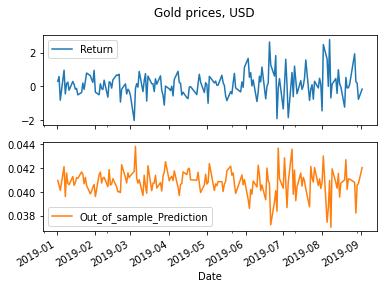

In [21]:
oosr['Out_of_sample_Prediction'] = model.predict(xtest)
oosr.plot(subplots=True, title='Gold prices, USD')
plt.show()